# Decision Trees Classification Model

## Reading in processed data

In [ ]:
# Basic imports
import numpy as np 
import pandas as pd 

# Acquire data from google drive
from google.colab import drive
drive.mount('/content/drive')

# Reading in processed data
train_data = pd.read_feather('/content/drive/My Drive/Colab Notebooks/training_data_processed_feather.feather')
test_data = pd.read_feather('/content/drive/My Drive/Colab Notebooks/testing_data_processed_feather.feather')
train_data = train_data.sample(n=int(len(train_data)*0.75))

#print(len(test_data))
#print(test_data.head())



Mounted at /content/drive


## Memory Usage Reduction 

In [ ]:
# Reducing memory usage func
def reduce_mem_usage(df):

    
    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')


    return df
# Implementing memory reduction func
train_data = reduce_mem_usage(train_data)
test_data = reduce_mem_usage(test_data)

## Creating pipeline to encode data before going through classifier

In [ ]:
# Imports for encoding data before model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Transformer for categorical features such as objects and boolean.
categorical_features = []
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# Transformer for numerical features such as floats and integers
numeric_features = ['index', 'building_id', 'square_feet', 'primary_use', 'meter',
       'air_temperature', 'day_of_year', 'hour', 'isDayTime', 'day_of_week']
                    
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

# Combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

## Producing the X and y train values that will train the data

In [ ]:
# Producing the training values
X_train = train_data.drop("meter_reading", axis = 1)

y_train = (train_data['meter_reading']).astype(int)


## Hyperparameter Tuning

Tuning max_depth hyperparameter

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [ ]:

# Hyper parameter testing
# Imports
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Producing sample training and test sets for testing hyperparameters

df_x = X_train.sample(n = 150000)
df_y = y_train.sample(n = 150000)

# Splitting test and train data
X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(df_x, df_y, 
                                                test_size=0.33, random_state=42)
# Creating values that will be tested
max_depth_test = np.arange(1,101,10)
acc_score=[]


for i in max_depth_test:
  # Decision Tree Classifier
  DTClassifier = Pipeline(
      [
       ('preprocessing', preprocessor),
      ('classifier', DecisionTreeClassifier(criterion="gini", random_state=42, 
                                            max_depth=i))
      ]
  )
  # Training
  DTClassifier.fit(X = X_train_hyp, y = y_train_hyp)
  # Predicting
  test_hyp = DTClassifier.predict(X_test_hyp)
  # Appending accuracy score
  acc_score.append(accuracy_score(test_hyp, y_test_hyp))
  
# Getting the value that is associated with best accuracy score
best_max_depth_index = acc_score.index(max(acc_score))
best_max = max_depth_test[best_max_depth_index]




Tuning random state hyperparameter

In [ ]:
# Creating loop for random state test
acc2_score=[]
random_state_test = np.arange(1,101,10)
for i in random_state_test:
  # Decision Tree Classifier
  DTClassifier = Pipeline(
      [
       ('preprocessing', preprocessor),
      ('classifier', DecisionTreeClassifier(criterion="gini", random_state=i, 
                                            max_depth=best_max))
      ]
  )
  # Training
  DTClassifier.fit(X = X_train_hyp, y = y_train_hyp)
  # Predicting
  test_hyp = DTClassifier.predict(X_test_hyp)
  acc2_score.append(accuracy_score(test_hyp, y_test_hyp))

# Best random state extracted
best_random_state_index = acc2_score.index(max(acc2_score))
best_max_rs = random_state_test[best_random_state_index]



71


Plotting hyperparameter tuning results

Text(0, 0.5, 'Accuracy Score')

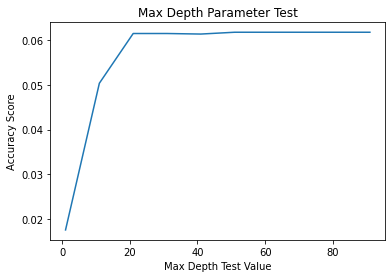

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracy for the hyperparameter
plt.plot(max_depth_test,acc_score)
plt.title("Max Depth Parameter Test")
plt.xlabel("Max Depth Test Value")
plt.ylabel("Accuracy Score")


Text(0, 0.5, 'Accuracy Score')

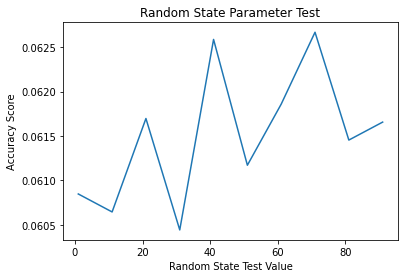

In [ ]:
# Plotting the accuracy for the hyperparameter
plt.plot(random_state_test,acc2_score)
plt.title("Random State Parameter Test")
plt.xlabel("Random State Test Value")
plt.ylabel("Accuracy Score")

Best random state is 1 and due to memory restrictions best max depth that can be used is 14

In [ ]:
# Deleting unnecessary values for memory usage reduction
del acc_score, acc2_score, y_test_hyp, X_train_hyp

## Fitting and Predicting

## Classification Pipeline

In [ ]:

# K-NEAREST NEIGHBOUR CLASSIFICATION


# KNN pipeline
DTClassifier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', DecisionTreeClassifier(criterion="gini", random_state=1, max_depth = 14))
    ]
)



Fitting data

In [ ]:
# Inputting the training data through the classifications

DTClassifier.fit(X = X_train, y = y_train)




Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('numericals',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['index', 'building_id',
                                                   'square_feet', 'primary_use',
                                                   'meter', 'air_temperature',
                                                   'day_of_year', 'hour',
                                                   'isDayTime',
                                                   'day_

Predicting data

In [ ]:
# Using the test data to produce predicted revenue values

# Creating steops of 20000 to loop through the test data
steps = np.arange(0,len(test_data), 20000)
DT_pred=[]
# Looping through at 20000 values at a time to reduce memory used
for i in steps:
  test_data_sample = test_data[i:i+20000]
  DT_pred.append(DTClassifier.predict(test_data_sample))

In [ ]:
# Un-nesting the list created
from itertools import chain
final_pred = list(chain.from_iterable(DT_pred))

## Creating dataframe for predicted values for Kaggle upload

In [ ]:
# Creating row_id (index)
row_id = np.arange(start = 0, stop = int(len(a)))

In [ ]:
# Combine into a dataframe for exporting
df = pd.DataFrame({"row_id":row_id, "meter_reading":final_pred})

# Exporting as csv
df.to_csv('/content/drive/My Drive/Colab Notebooks/DT_Model_final.csv', index=False)